In [1]:
# Import custom functions to load windsat data
import matplotlib.pyplot as plt
import xarray as xr
import os
import sys

sys.path.append("../")
from src.processing import windsat_datacube

# Results will be saved here
save_path = r"../data/processed/"

# Folder with the data
folder_path = r"../data/raw/daily_Windsat"

In [2]:
ds = windsat_datacube(folder_path)
ds

<xarray.Dataset> Size: 3GB
Dimensions:         (day_number: 21, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
  * day_number      (day_number) int32 84B 1 2 3 4 5 6 7 ... 16 17 18 19 20 21
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/13)
    longitude       (day_number, longitude_grid) float32 121kB dask.array<chunksize=(1, 1440), meta=np.ndarray>
    latitude        (day_number, latitude_grid) float32 60kB dask.array<chunksize=(1, 720), meta=np.ndarray>
    node            (day_number, swath_sector) int32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_hpol  (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    eia_nominal     (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...              ...
    eaa             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 697MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) int32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

In [3]:
# Get the number of measurements per pixel
tbtoa_count = ds.tbtoa.count(dim="day_number")
tbtoa_count.attrs = {
    "Description": "Total count of measurements in the whole datset",
}
save_into = os.path.join(save_path, "tbtoa_count.nc")
tbtoa_count.to_netcdf(save_into)
print(f"TBToA count saved in {save_into}")
tbtoa_count

TBToA count saved in ../data/processed/tbtoa_count.nc


<xarray.DataArray 'tbtoa' (polarization: 2, frequency_band: 2,
                           latitude_grid: 720, longitude_grid: 1440,
                           swath_sector: 2)> Size: 33MB
dask.array<sum-aggregate, shape=(2, 2, 720, 1440, 2), dtype=int32, chunksize=(1, 1, 240, 480, 1), chunktype=numpy.ndarray>
Coordinates:
    lat      (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon      (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
Dimensions without coordinates: polarization, frequency_band, latitude_grid,
                                longitude_grid, swath_sector
Attributes:
    Description:  Total count of measurements in the whole datset

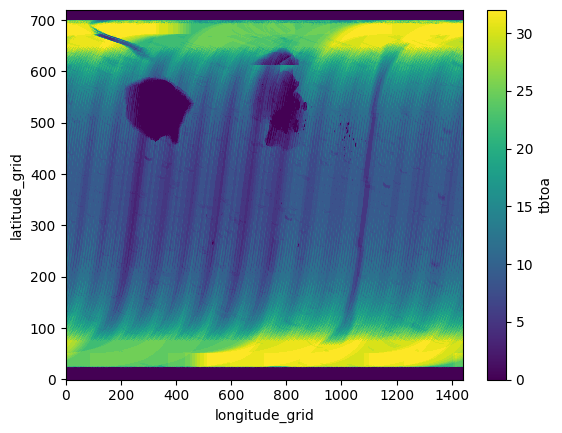

In [4]:
# TODO: Reproject into lat-lon coordinates and plot a coastline over the counts
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(1, 1)
tbtoa_count.sel(polarization=0, frequency_band=0, swath_sector=1).plot(ax=ax)

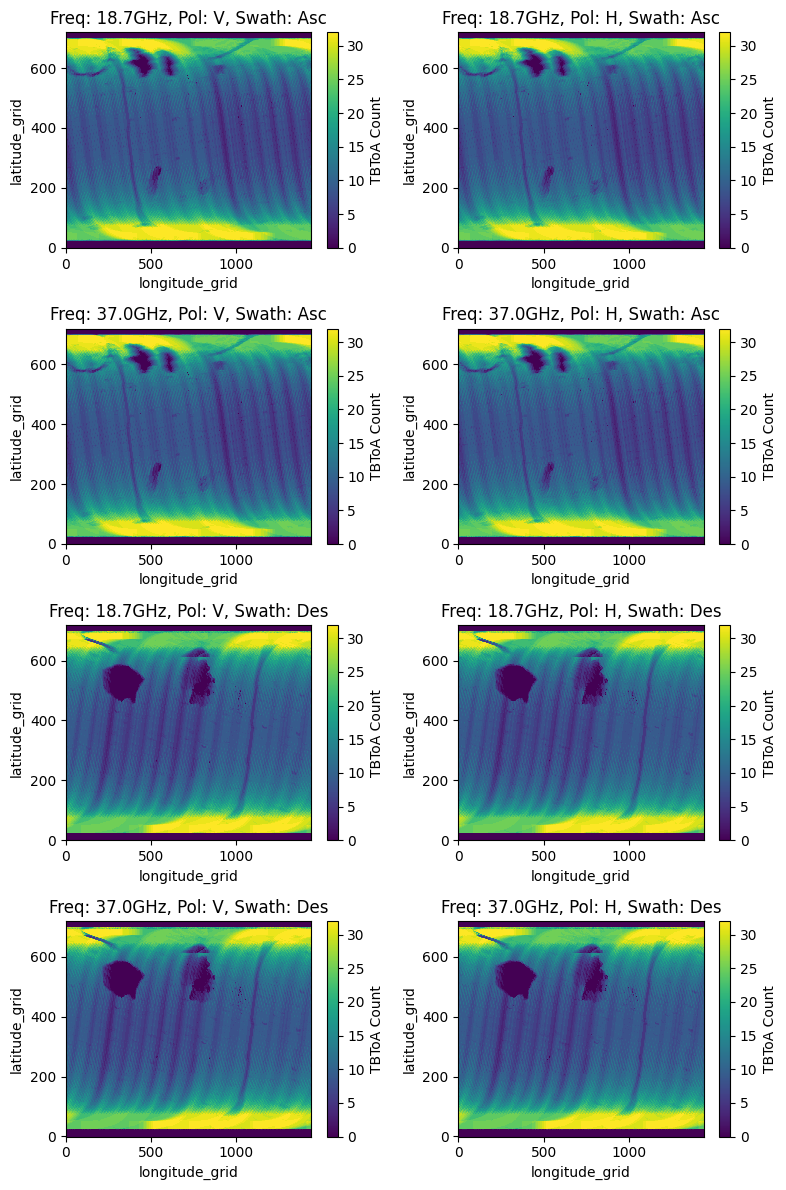

In [5]:
# Custom function
# def dimensional_plot(
#     ds: xr.DataArray, save_path: str = None, cbar_label: str = None
# ) -> None:
#     """
#     Given a data_array, plot each combination of:
#         polarization : [0,1]
#         frequency: [0,1]
#         swath_sector : [0,1]

#     param save_path: if not None, atempt to save the plot with the given path
#     param cbar_label: if not None, swap the default xarray.plot label for it
#     """

#     dimension_dict = {
#         "polarization": {0: "V", 1: "H"},
#         "frequency": {0: "18.7GHz", 1: "37.0GHz"},
#         "sector": {0: "Asc", 1: "Des"},
#     }

#     fig, axs = plt.subplots(4, 2, figsize=(8, 12))

#     plot_number = 0
#     for sector in range(0, 2, 1):
#         for freq in range(0, 2, 1):
#             for pol in range(0, 2, 1):
#                 nrow = plot_number // 2
#                 ncol = plot_number % 2
#                 ax = axs[nrow, ncol]

#                 # Plot data
#                 plot = ds.sel(
#                     polarization=pol, frequency_band=freq, swath_sector=sector
#                 ).plot(ax=ax)

#                 # TODO: Add coastline
#                 """
#                 Data is in 1/4º grid, cartopy uses latitude and longitude.
#                     - Change the grid
#                     OR
#                     - Change the coastline feature somehow.
#                 """
#                 # ax.coastlines(resolution="110m", color = "white", linewidth=1)

#                 ax.set_title(
#                     f"Freq: {dimension_dict['frequency'][freq]}, "
#                     f"Pol: {dimension_dict['polarization'][pol]}, "
#                     f"Swath: {dimension_dict['sector'][sector]}"
#                 )
#                 if cbar_label:
#                     colorbar = plot.colorbar
#                     colorbar.set_label(cbar_label)

#                 plot_number += 1

#     fig.tight_layout()
#     if save_path:
#         try:
#             fig.savefig(save_path)
#         except Exception as e:
#             print(f"Unable to save plot: {e}")

#     return

from src.visuals import dimensional_plot

dimensional_plot(tbtoa_count, cbar_label="TBToA Count")

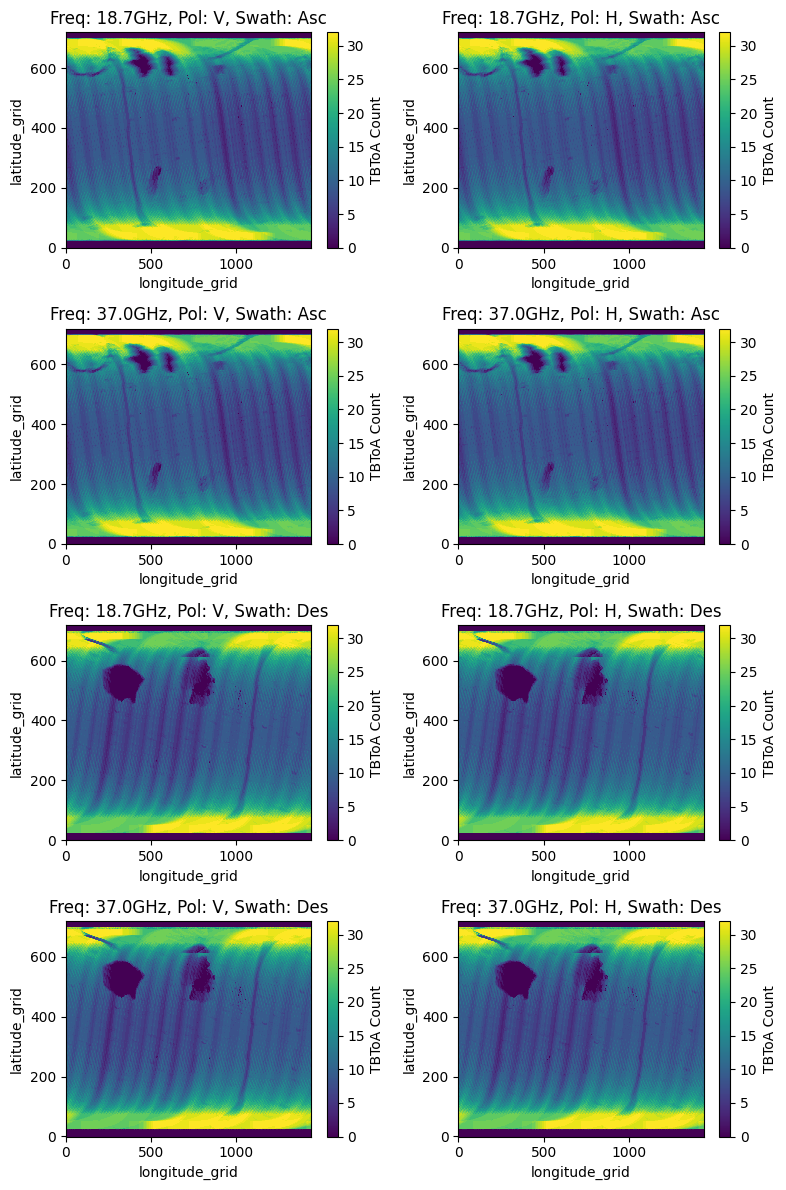

In [6]:
dimensional_plot(
    tbtoa_count, save_path="../data/processed/tbtoa_count.png", cbar_label="TBToA Count"
)

# Average over the whole dataset

In [8]:
# Get the number of measurements per pixel
tbtoa_mean = ds.tbtoa.mean(dim="day_number")
tbtoa_mean.attrs = {
    "Description": "Yearly average TbToA ",
}
save_into = os.path.join(save_path, "tbtoa_mean.nc")
tbtoa_mean.to_netcdf(save_into)
print(f"TBToA count saved in {save_into}")
tbtoa_mean

TBToA count saved in ../data/processed/tbtoa_mean.nc


<xarray.DataArray 'tbtoa' (polarization: 2, frequency_band: 2,
                           latitude_grid: 720, longitude_grid: 1440,
                           swath_sector: 2)> Size: 33MB
dask.array<mean_agg-aggregate, shape=(2, 2, 720, 1440, 2), dtype=float32, chunksize=(1, 1, 240, 480, 1), chunktype=numpy.ndarray>
Coordinates:
    lat      (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon      (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
Dimensions without coordinates: polarization, frequency_band, latitude_grid,
                                longitude_grid, swath_sector
Attributes:
    Description:  Yearly average TbToA

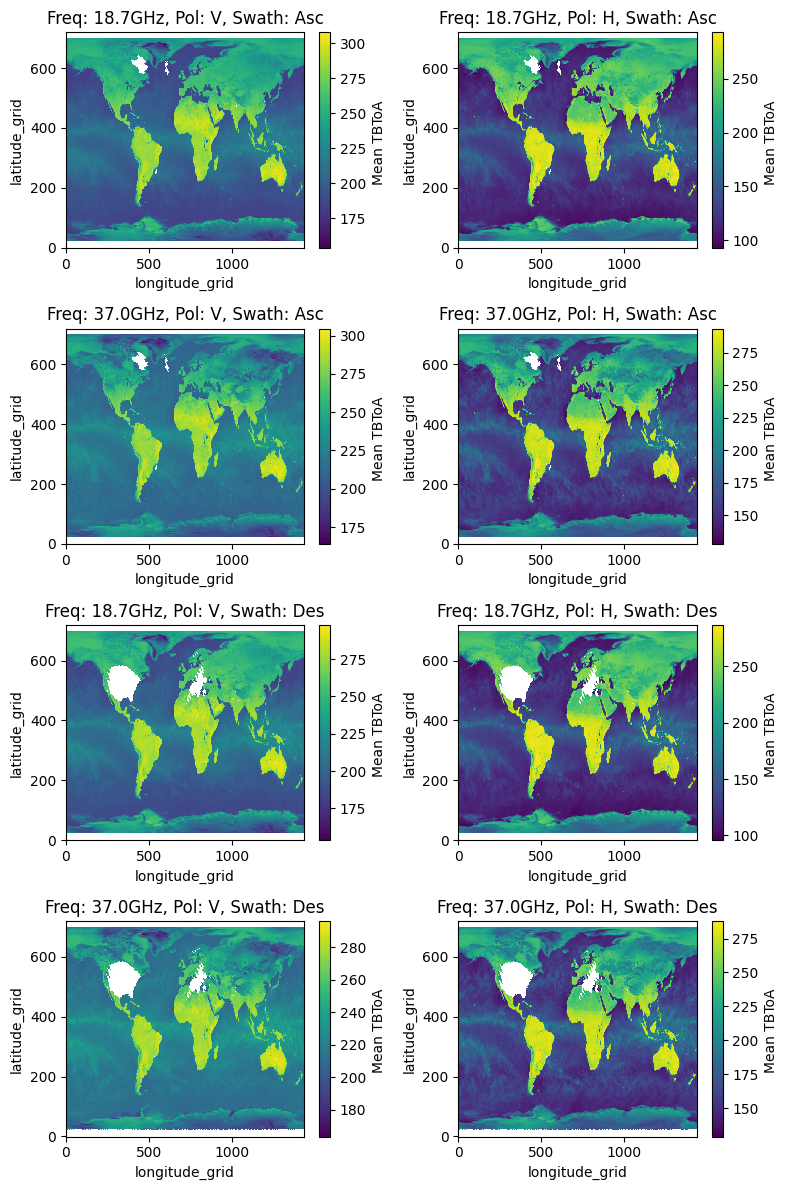

In [9]:
dimensional_plot(
    tbtoa_mean, save_path="../data/processed/tbtoa_mean.png", cbar_label="Mean TBToA "
)

# ERC (All 2017 data)

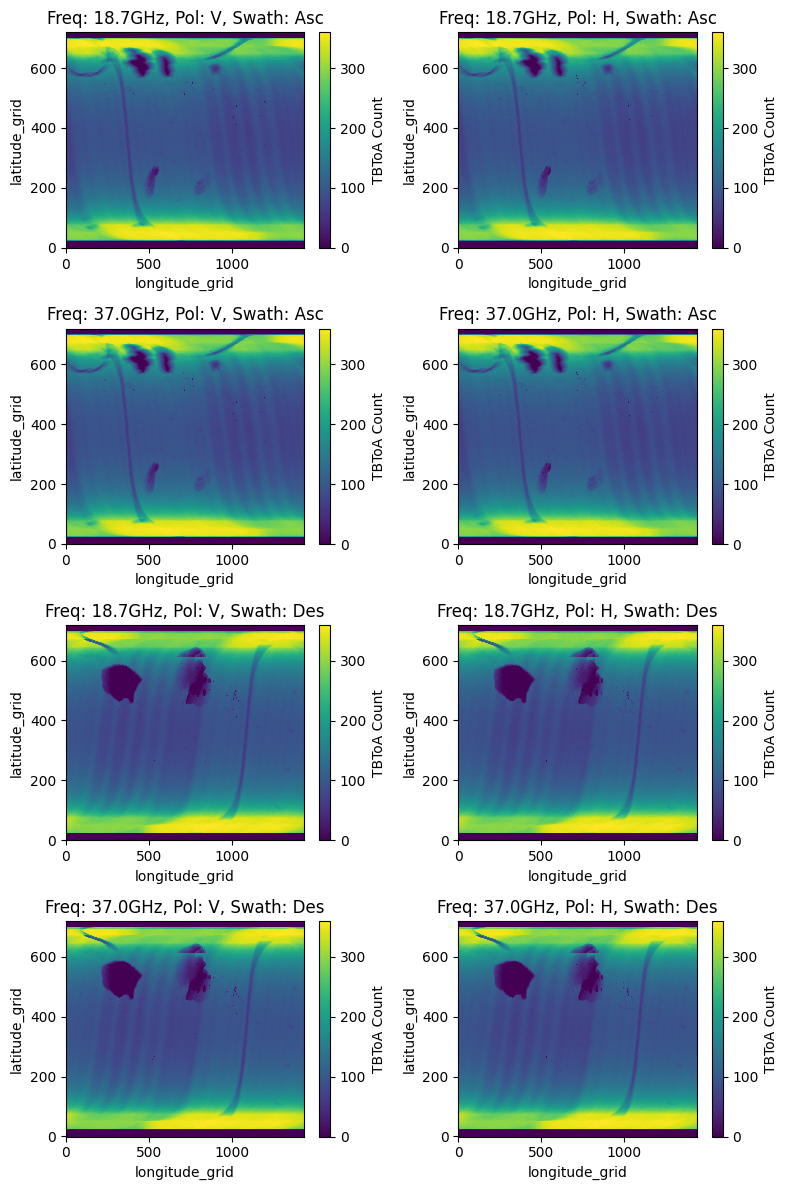

In [10]:
ds = xr.open_dataset("../data/processed/erc/tbtoa_count.nc")
dimensional_plot(ds.tbtoa, cbar_label="TBToA Count")

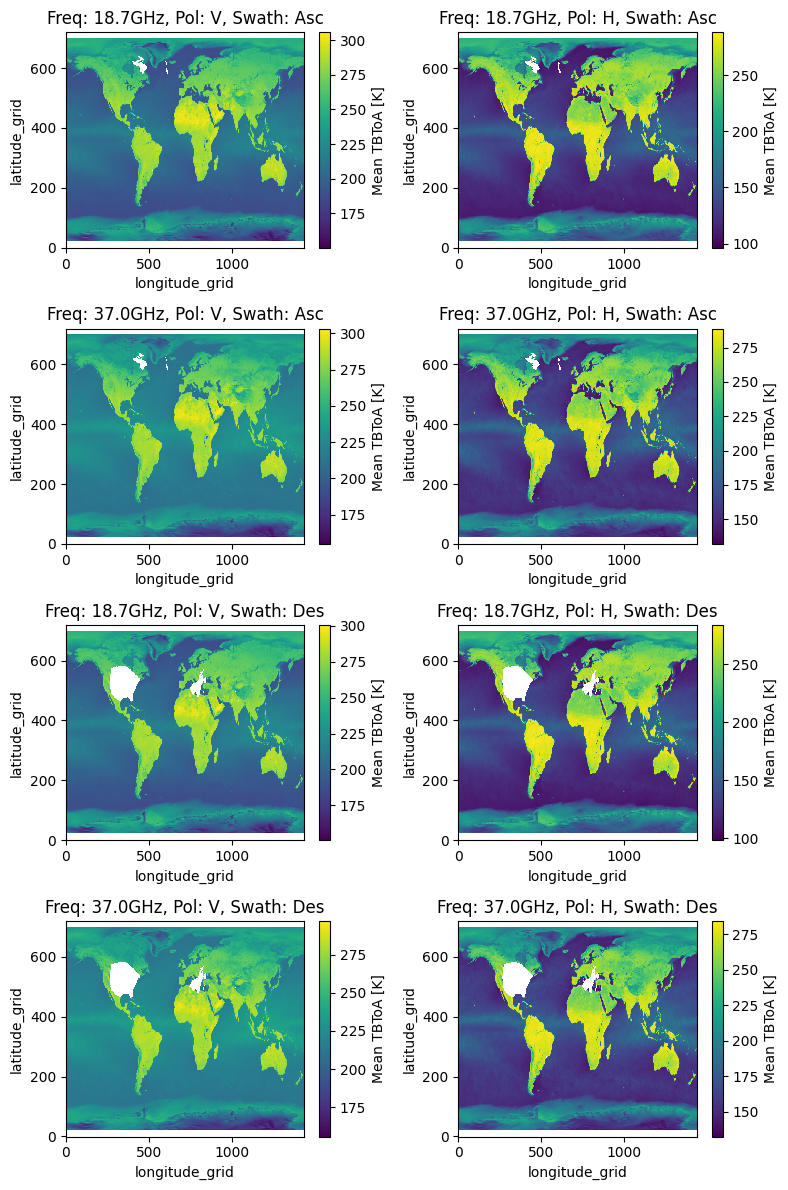

In [11]:
ds = xr.open_dataset("../data/processed/erc/tbtoa_mean.nc")
dimensional_plot(ds.tbtoa, cbar_label="Mean TBToA [K]")

----

# UPDATE:
We noticed that the original daily windsat data had the ERS5 skin temp and air temp variables, so by modifying the windsat_datacube function we can retrieve them and start tampering with the data inmediatly.

In [123]:
#imports
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
from src.processing import windsat_datacube, create_landmask


<xarray.Dataset> Size: 4GB
Dimensions:         (day_number: 21, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
  * day_number      (day_number) int32 84B 1 2 3 4 5 6 7 ... 16 17 18 19 20 21
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/14)
    longitude       (day_number, longitude_grid, latitude_grid) float32 87MB dask.array<chunksize=(1, 1440, 720), meta=np.ndarray>
    latitude        (day_number, latitude_grid, longitude_grid) float32 87MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    node            (day_number, swath_sector, latitude_grid, longitude_grid) float64 348MB dask.array<chunksize=(1, 2, 720, 1440), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band, latitude_grid, longitude_grid) float32 174MB dask.array<chunksize=(1, 2, 720, 1440), meta=np.ndarray>
    frequency_hpol  (day_number, frequency_band, latitude_grid, longitude_grid) float32 174MB dask.array<chunksize=(1, 2, 720, 1440), meta=np.ndarray>
    eia_nominal     (day_number, frequency_band, latitude_grid, longitude_grid) float32 174MB dask.array<chunksize=(1, 2, 720, 1440), meta=np.ndarray>
    ...              ...
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 697MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) float64 348MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    landmask        (latitude_grid, longitude_grid) float64 8MB 0.0 0.0 ... nan
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

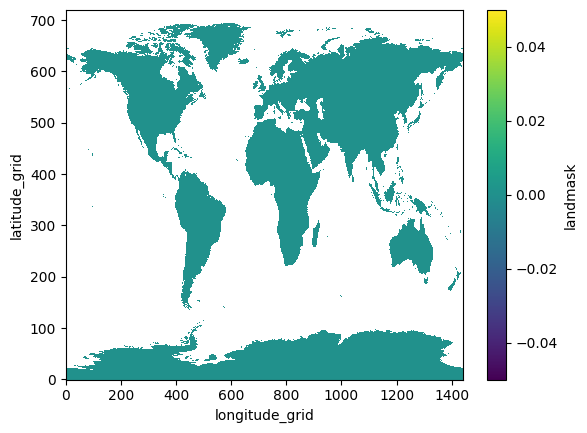

In [64]:
# Load the data in the folder
folder_path = "../data/raw/Daily_Windsat/"
ds = windsat_datacube(folder_path=folder_path)
# Add the landmask and filter the dataset with only the land pixels

landmask = create_landmask(lat=ds.lat.values, lon=ds.lon.values)
ds["landmask"] = (("latitude_grid","longitude_grid"), landmask.values)

ds.landmask.attrs = {
    "Description": "Landmask object from regionmask, 0 for Land pixels, NaN for ocean"
}
ds.landmask.plot()

# Filter the ocean pixels
ds=ds.where(ds.landmask == 0)
ds

In [65]:
# Quality assessment over the ERA5 variables, ads == average dataset over the days
ads = ds.mean(dim="day_number")
ads.surtep_ERA5

<xarray.DataArray 'surtep_ERA5' (latitude_grid: 720, longitude_grid: 1440,
                                 swath_sector: 2)> Size: 8MB
dask.array<mean_agg-aggregate, shape=(720, 1440, 2), dtype=float32, chunksize=(360, 720, 1), chunktype=numpy.ndarray>
Coordinates:
    lat      (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon      (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
Dimensions without coordinates: latitude_grid, longitude_grid, swath_sector

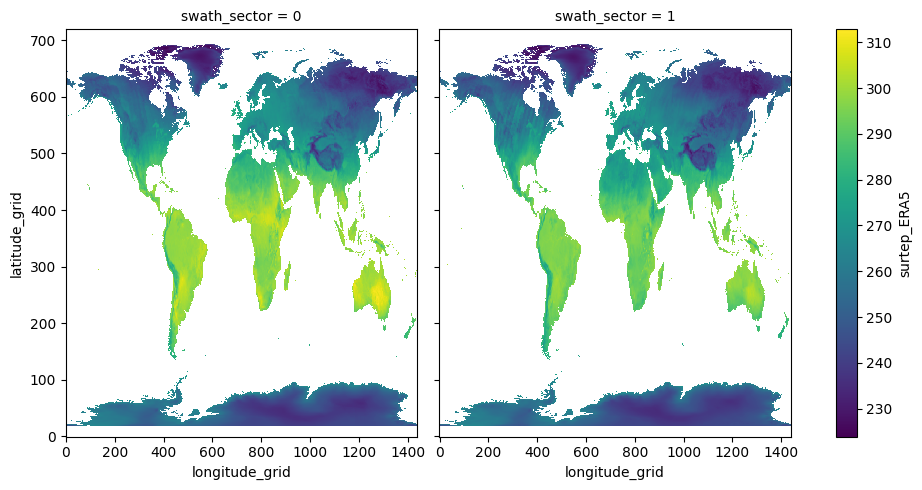

In [66]:
# Two plots, one for each swath_sector : {0: "Asc", 1: "Des"},
ads.surtep_ERA5.plot(col="swath_sector", figsize=(10,5))

In [81]:
npixels = (ads.landmask.values == 0).sum(axis=None)
print(f"We have {npixels} potential pixel locations for training")

We have 342944 potential pixel locations for training


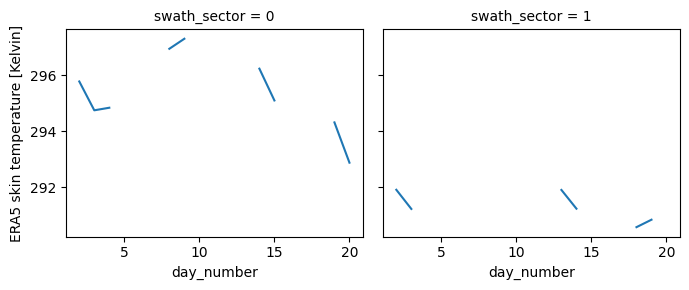

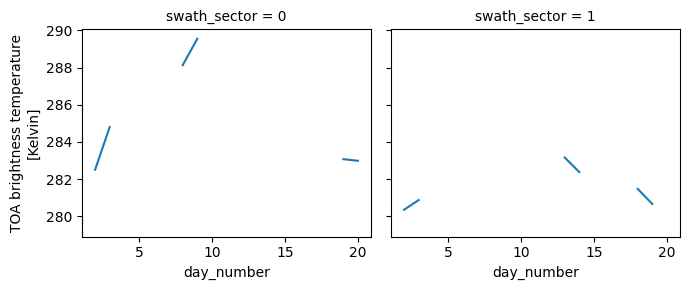

In [100]:
# Select a location and plot the variation over the day_number

ds.surtep_ERA5.sel(
    longitude_grid = 800,
    latitude_grid =300,
).plot(
    col="swath_sector"
)

ds.tbtoa.sel(
    longitude_grid = 800,
    latitude_grid =300,
    frequency_band = 0,
    polarization = 0
).plot(
    col="swath_sector"
)

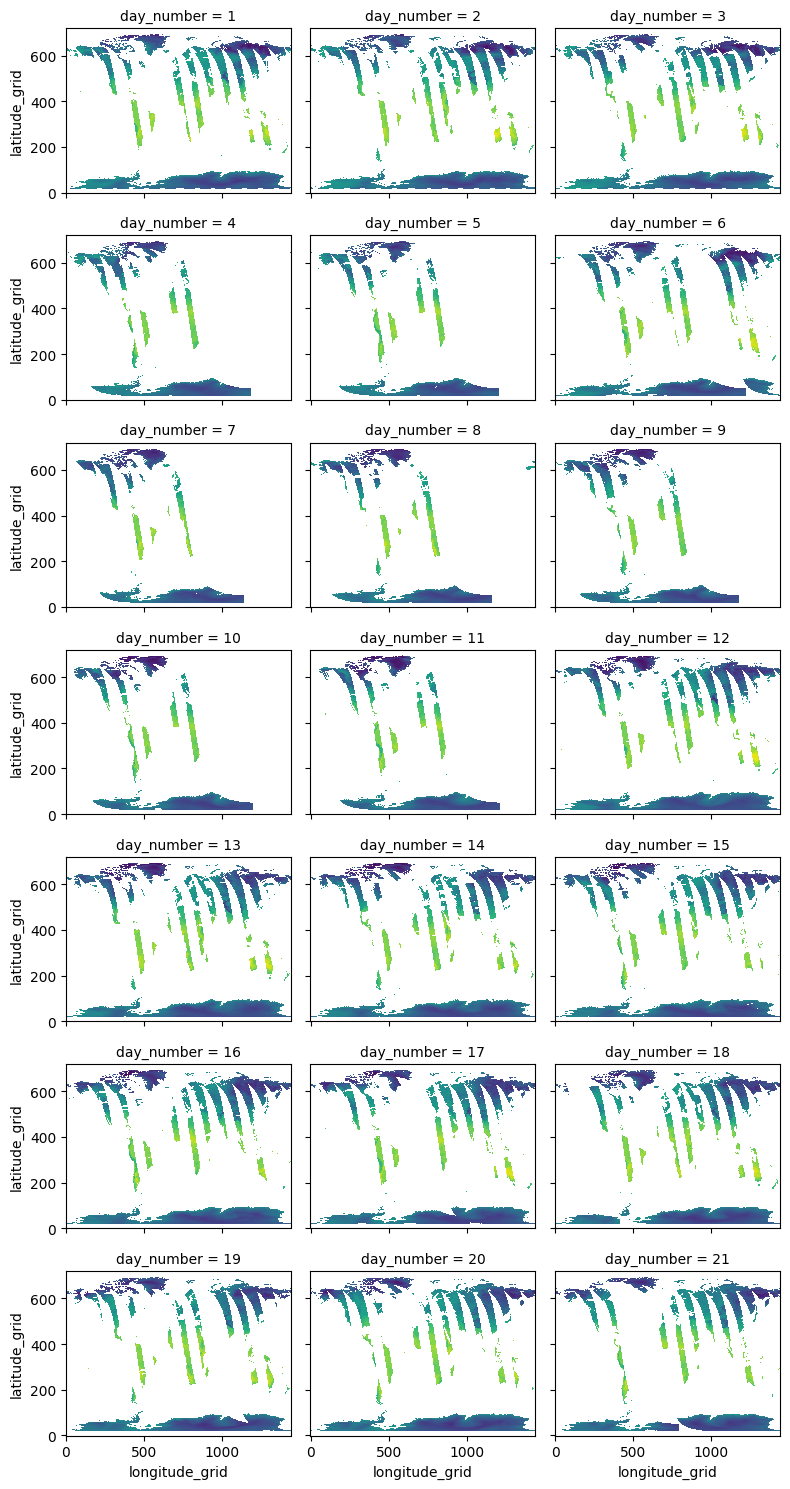

In [99]:
# Plot all the days of surtep_ERA5 to see if we have missing values:

plot = ds.surtep_ERA5.sel(swath_sector=0).plot(
    col = "day_number",
    col_wrap = 3,
    figsize = (8,15),
    add_colorbar = False
)

### Era5 data is already selected to contain only pixels and times passed over 

In [110]:
# Train test split, the pixels in the landmask

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(ds.tbtoa, ds.surtep_ERA5)

In [116]:
X_train.day_number, X_test.day_number


(<xarray.DataArray 'day_number' (day_number: 15)> Size: 60B
 array([12, 19,  6, 18, 20, 11,  2,  9, 13, 14,  3,  8,  5, 16,  7])
 Coordinates:
   * day_number  (day_number) int32 60B 12 19 6 18 20 11 2 9 13 14 3 8 5 16 7
 Attributes:
     Description:  Int, day of the year {dates[0].year},
 <xarray.DataArray 'day_number' (day_number: 6)> Size: 24B
 array([21,  1, 17, 10,  4, 15])
 Coordinates:
   * day_number  (day_number) int32 24B 21 1 17 10 4 15
 Attributes:
     Description:  Int, day of the year {dates[0].year})

# Train-test split
the standard sklearn function splits the dataset with the index that it finds (day_number). I would like to split the dataset using the lat-lon gird indeces instead.

For that i will create a Train-test mask, that for every pixel within the landmask we assign a 20-80 split of test-train labels

In [130]:
# use np.argwhere to retrieve the indeces with land
land_indeces = np.argwhere(ds.landmask.values == 0)
print(land_indeces.shape)


(342944, 2)


In [131]:
train_indeces , test_indeces = train_test_split(land_indeces, test_size=0.2, random_state=13)

In [148]:
train_test_mask = np.copy(landmask)
train_test_mask[train_indeces[:,0], train_indeces[:,1]] = 1

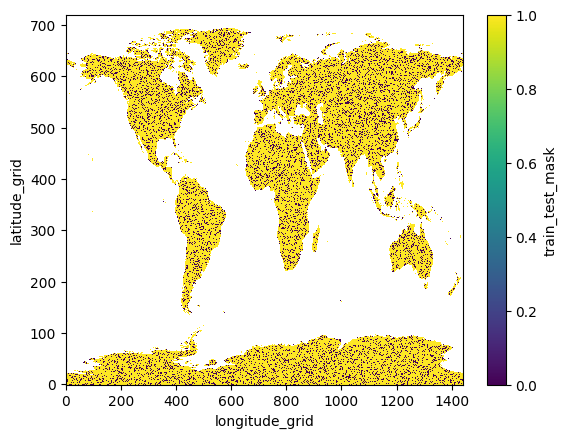

In [151]:
ds["train_test_mask"] = (("latitude_grid", "longitude_grid"), train_test_mask)
ds.train_test_mask.attrs = {
    "Desccirption": "Random mask for train test split based on latitude and longitude (same for all days). Nan for Ocean, 0 for test, 1 for train"
}
ds.train_test_mask.plot()

In [155]:
trainds = ds.where(ds.train_test_mask == 1)
testds = ds.where(ds.train_test_mask == 0)

In [159]:
testds.surtep_ERA5.sel(swath_sector=0).plot(
    col = "day_number",
    col_wrap = 3,
    figsize = (8,15),
    add_colorbar = False
)